# Breakdown of NFL Stats 2019-2022

As an avid NFL fan I enjoy all things football. As a fan of a struggling team I want to explore what factors play an important role in having a winning season. How important are ofenses, defenses, home field advantage, and weather in football games? Join me as I explore everything football and let's find out!

In [1]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, locals())
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpb 
import seaborn as sns 
%matplotlib inline
mpb.style.use('seaborn')
mpb.rc("figure", autolayout=True)
mpb.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### After importing the nessicary libraries I load in my data sets and inspect the data to determine the important colums needed for my analysis.

In [2]:
Offense = pd.read_csv("nfl_pass_rush_receive_raw_data.csv")
Offense.columns

Index(['game_id', 'player_id', 'pos', 'player', 'team', 'pass_cmp', 'pass_att',
       'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds',
       'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td',
       'rush_long', 'targets', 'rec', 'rec_yds', 'rec_td', 'rec_long',
       'fumbles_lost', 'rush_scrambles', 'designed_rush_att',
       'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play',
       'Team_abbrev', 'Opponent_abbrev', 'two_point_conv', 'total_ret_td',
       'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus',
       'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'Total_FDP', 'Off_FDP',
       'Total_SDP', 'Off_SDP', 'pass_target_yds', 'pass_poor_throws',
       'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac',
       'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense',
       'off_pct', 'vis_team', 'home_team', 'vis_score', 'home_score', 'OT',
       'Roof', 'Surface', 'Temperature', 'Humidit

In [3]:
offense_subset = Offense[['game_id', 'player_id', 'pos', 'player', 'team', 'pass_cmp', 'pass_att',
       'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds',
       'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td',
       'rush_long','fumbles_lost', 'rush_scrambles','Team_abbrev', 'Opponent_abbrev', 'two_point_conv', 'total_ret_td',
       'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus',
       'rec_yds_bonus', 'pass_poor_throws','pass_blitzed', 'pass_hurried', 'rush_yac',
       'rush_broken_tackles', 'rec_yac', 'rec_drops', 'offense',
       'off_pct', 'vis_team', 'home_team', 'vis_score', 'home_score', 'OT',
       'Roof', 'Surface', 'Temperature', 'Humidity', 'Wind_Speed', 'game_date']]
offense_subset

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,rush_yds,rush_td,rush_long,fumbles_lost,rush_scrambles,Team_abbrev,Opponent_abbrev,two_point_conv,total_ret_td,offensive_fumble_recovery_td,pass_yds_bonus,rush_yds_bonus,rec_yds_bonus,pass_poor_throws,pass_blitzed,pass_hurried,rush_yac,rush_broken_tackles,rec_yac,rec_drops,offense,off_pct,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,47,91.4,3,8,0,10,0,1,GNB,CHI,0,0,0,0,0,0,5,8,6,2,0,0,0,61,100,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,0,0,0,0.0,13,39,0,9,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,18,1,1,0,37,61,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,0,0,2,0,41,67,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,0,0,19,0,59,97,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,0,0,17,0,33,54,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,202202130cin,PoweBr00,WR,Brandon Powell,LAR,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,LAR,CIN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19969,202202130cin,HoweGr00,RB,Buddy Howell,LAR,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,LAR,CIN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19970,202202130cin,SampDr00,TE,Drew Sample,CIN,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,CIN,LAR,0,0,0,0,0,0,0,0,0,0,0,0,0,19,31,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19971,202202130cin,TaylTr02,WR,Trent Taylor,CIN,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,CIN,LAR,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


In [4]:
Defense = pd.read_csv("nfl_dst_raw_data.csv")
Defense.columns

Index(['game_id', 'team', 'def_int', 'def_int_td', 'sacks', 'fumbles_rec',
       'fumbles_rec_td', 'blocked_kick', 'safety', 'def_two_point_conv',
       'total_ret_td', 'Team_abbrev', 'Opponent_abbrev', 'Opponent_score',
       'points_allowed_0', 'points_allowed_1_6', 'points_allowed_7_13',
       'points_allowed_14_20', 'points_allowed_21_27', 'points_allowed_28_34',
       'points_allowed_35', 'Total_DKP', 'Total_FDP', 'vis_team', 'home_team',
       'vis_score', 'home_score', 'OT', 'Roof', 'Surface', 'Temperature',
       'Humidity', 'Wind_Speed', 'Vegas_Line', 'Vegas_Favorite', 'Over_Under',
       'game_date'],
      dtype='object')

In [5]:
defense_subset = Defense[['game_id', 'team', 'def_int', 'def_int_td', 'sacks', 'fumbles_rec',
       'fumbles_rec_td', 'blocked_kick', 'safety', 'def_two_point_conv',
       'total_ret_td', 'Team_abbrev', 'Opponent_abbrev', 'Opponent_score', 'vis_team', 'home_team',
       'vis_score', 'home_score', 'OT', 'Roof', 'Surface', 'Temperature',
       'Humidity', 'Wind_Speed', 'game_date']]
defense_subset

,game_id,team,def_int,def_int_td,sacks,fumbles_rec,fumbles_rec_td,blocked_kick,safety,def_two_point_conv,total_ret_td,Team_abbrev,Opponent_abbrev,Opponent_score,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,CHI,0,0,5,0,0,0,0,0,0,CHI,GNB,10,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,GNB,1,0,5,0,0,0,0,0,0,GNB,CHI,3,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909080car,LAR,1,0,3,2,0,0,0,0,0,LAR,CAR,27,LAR,CAR,30,27,False,outdoors,grass,87,53,3,2019-09-08
3,201909080car,CAR,1,0,1,0,0,1,0,0,0,CAR,LAR,30,LAR,CAR,30,27,False,outdoors,grass,87,53,3,2019-09-08
4,201909080cle,CLE,0,0,4,0,0,0,0,0,0,CLE,TEN,43,TEN,CLE,43,13,False,outdoors,grass,71,55,10,2019-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,202201300kan,KAN,1,0,1,0,0,0,0,0,0,KAN,CIN,27,CIN,KAN,27,24,True,outdoors,grass,41,41,4,2022-01-30
1620,202201300ram,LAR,1,0,0,0,0,0,0,0,0,LAR,SFO,17,SFO,LAR,17,20,False,dome,matrixturf,72,45,0,2022-01-30
1621,202201300ram,SFO,1,0,2,0,0,0,0,0,0,SFO,LAR,20,SFO,LAR,17,20,False,dome,matrixturf,72,45,0,2022-01-30
1622,202202130cin,CIN,2,0,2,0,0,0,0,0,0,CIN,LAR,23,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


In [6]:
Kicking = pd.read_csv("nfl_kicking_raw_data.csv")
Kicking.columns

Index(['game_id', 'Off_abbrev', 'Def_abbrev', 'fga', 'fgm', 'xpa', 'xpm',
       'fga_0_39', 'fgm_0_39', 'fga_40_49', 'fgm_40_49', 'fga_50', 'fgm_50',
       'player', 'Total_DKP', 'Total_FDP', 'Total_SDP', 'vis_team',
       'home_team', 'vis_score', 'home_score', 'OT', 'Roof', 'Surface',
       'Temperature', 'Humidity', 'Wind_Speed', 'Vegas_Line', 'Vegas_Favorite',
       'Over_Under', 'game_date'],
      dtype='object')

In [7]:
kicking_subset = Kicking[['game_id', 'Off_abbrev', 'Def_abbrev', 'fga', 'fgm', 'xpa', 'xpm',
       'fga_0_39', 'fgm_0_39', 'fga_40_49', 'fgm_40_49', 'fga_50', 'fgm_50',
       'player', 'Total_DKP', 'vis_team','home_team', 'vis_score', 'home_score', 'OT', 'Roof', 'Surface',
       'Temperature', 'Humidity', 'Wind_Speed', 'game_date']]
kicking_subset

,game_id,Off_abbrev,Def_abbrev,fga,fgm,xpa,xpm,fga_0_39,fgm_0_39,fga_40_49,fgm_40_49,fga_50,fgm_50,player,Total_DKP,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,CHI,GNB,1,1,0,0,1,1,0,0,0,0,Eddy Pineiro,3,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,GNB,CHI,1,1,1,1,1,1,0,0,0,0,Mason Crosby,4,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909080car,CAR,LAR,3,2,3,3,0,0,1,1,2,1,Joey Slye,12,LAR,CAR,30,27,False,outdoors,grass,87,53,3,2019-09-08
3,201909080car,LAR,CAR,4,3,3,3,1,1,2,1,1,1,Greg Zuerlein,15,LAR,CAR,30,27,False,outdoors,grass,87,53,3,2019-09-08
4,201909080cle,TEN,CLE,2,2,5,5,1,1,0,0,1,1,Cairo Santos,13,TEN,CLE,43,13,False,outdoors,grass,71,55,10,2019-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,202201300kan,KAN,CIN,1,1,3,3,0,0,1,1,0,0,Harrison Butker,7,CIN,KAN,27,24,True,outdoors,grass,41,41,4,2022-01-30
1621,202201300ram,LAR,SFO,3,2,2,2,1,1,1,1,1,0,Matt Gay,9,SFO,LAR,17,20,False,dome,matrixturf,72,45,0,2022-01-30
1622,202201300ram,SFO,LAR,1,1,2,2,0,0,0,0,0,0,Robbie Gould,2,SFO,LAR,17,20,False,dome,matrixturf,72,45,0,2022-01-30
1623,202202130cin,CIN,LAR,2,2,2,2,0,0,0,0,0,0,Evan McPherson,2,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


#### Checking the data for Null Values

In [8]:
offense_subset.isna().sum()

game_id                         0
player_id                       0
pos                             0
player                          0
team                            0
pass_cmp                        0
pass_att                        0
pass_yds                        0
pass_td                         0
pass_int                        0
pass_sacked                     0
pass_sacked_yds                 0
pass_long                       0
pass_rating                     0
rush_att                        0
rush_yds                        0
rush_td                         0
rush_long                       0
fumbles_lost                    0
rush_scrambles                  0
Team_abbrev                     0
Opponent_abbrev                 0
two_point_conv                  0
total_ret_td                    0
offensive_fumble_recovery_td    0
pass_yds_bonus                  0
rush_yds_bonus                  0
rec_yds_bonus                   0
pass_poor_throws                0
pass_blitzed  

In [9]:
defense_subset.isna().sum()

game_id               0
team                  0
def_int               0
def_int_td            0
sacks                 0
fumbles_rec           0
fumbles_rec_td        0
blocked_kick          0
safety                0
def_two_point_conv    0
total_ret_td          0
Team_abbrev           0
Opponent_abbrev       0
Opponent_score        0
vis_team              0
home_team             0
vis_score             0
home_score            0
OT                    0
Roof                  0
Surface               0
Temperature           0
Humidity              0
Wind_Speed            0
game_date             0
dtype: int64

In [10]:
kicking_subset.isna().sum()

game_id        0
Off_abbrev     0
Def_abbrev     0
fga            0
fgm            0
xpa            0
xpm            0
fga_0_39       0
fgm_0_39       0
fga_40_49      0
fgm_40_49      0
fga_50         0
fgm_50         0
player         0
Total_DKP      0
vis_team       0
home_team      0
vis_score      0
home_score     0
OT             0
Roof           0
Surface        0
Temperature    0
Humidity       0
Wind_Speed     0
game_date      0
dtype: int64

### Exploration of Offensive Passing and Rushing Stats

Starting with querying each dataframe in order to identify winners and losers of each game. 

In [11]:
offense_subset

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,rush_yds,rush_td,rush_long,fumbles_lost,rush_scrambles,Team_abbrev,Opponent_abbrev,two_point_conv,total_ret_td,offensive_fumble_recovery_td,pass_yds_bonus,rush_yds_bonus,rec_yds_bonus,pass_poor_throws,pass_blitzed,pass_hurried,rush_yac,rush_broken_tackles,rec_yac,rec_drops,offense,off_pct,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,47,91.4,3,8,0,10,0,1,GNB,CHI,0,0,0,0,0,0,5,8,6,2,0,0,0,61,100,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,0,0,0,0.0,13,39,0,9,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,18,1,1,0,37,61,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,0,0,2,0,41,67,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,0,0,19,0,59,97,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,GNB,CHI,0,0,0,0,0,0,0,0,0,0,0,17,0,33,54,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,202202130cin,PoweBr00,WR,Brandon Powell,LAR,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,LAR,CIN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19969,202202130cin,HoweGr00,RB,Buddy Howell,LAR,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,LAR,CIN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19970,202202130cin,SampDr00,TE,Drew Sample,CIN,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,CIN,LAR,0,0,0,0,0,0,0,0,0,0,0,0,0,19,31,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19971,202202130cin,TaylTr02,WR,Trent Taylor,CIN,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,CIN,LAR,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


In [12]:
offense_subset.describe()

,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,rush_yds,rush_td,rush_long,fumbles_lost,rush_scrambles,two_point_conv,total_ret_td,offensive_fumble_recovery_td,pass_yds_bonus,rush_yds_bonus,rec_yds_bonus,pass_poor_throws,pass_blitzed,pass_hurried,rush_yac,rush_broken_tackles,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,Temperature,Humidity,Wind_Speed
count,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000
mean,1.844240,2.860011,20.565513,0.131728,0.064988,0.192059,1.299354,3.401742,9.026606,2.179392,9.488810,0.077605,3.636910,0.040505,0.134231,0.016272,0.001252,0.000200,0.019877,0.015471,0.031593,0.478346,0.880539,0.281480,4.205277,0.145096,9.532569,0.133731,32.708857,48.993691,23.221149,23.912382,62.909378,55.658990,5.836179
std,6.294815,9.659786,70.841227,0.550405,0.336662,0.789580,5.613713,11.543382,28.645285,4.739141,23.215203,0.319732,8.181984,0.208980,0.644700,0.130803,0.036747,0.014151,0.139581,0.123419,0.174917,1.756335,3.244871,1.183527,11.881185,0.588864,15.184525,0.391542,21.951155,31.952697,10.265776,10.184923,15.283144,17.077761,5.986499
min,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-28.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,19.000000,16.000000,17.000000,52.000000,45.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,31.000000,47.000000,23.000000,24.000000,72.000000,48.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000,0.000000,51.000000,78.000000,30.000000,31.000000,72.000000,68.000000,10.000000
max,47.000000,68.000000,525.000000,5.000000,5.000000,9.000000,79.000000,93.000000,158.300000,35.000000,253.000000,6.000000,98.000000,3.000000,12.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,19.000000,36.000000,20.000000,127.000000,11.000000,153.000000,6.000000,100.000000,100.000000,59.000000,56.000000,93.000000,100.000000,35.000000


In [13]:
QB_stats1 = sqldf("""
WITH 
    df1 AS
    (SELECT 
        player,
        player_id,
        team,
        CAST(pass_cmp AS float) AS pass_completions,
        pass_att AS pass_attempts,
        pass_yds AS total_yards,
        pass_td AS pass_touchdowns,
        pass_int AS total_interceptions,
        rush_yds AS rushing_yards, 
        rush_td AS rushing_touchdowns,
        home_team,
        home_score,
        vis_team,
        vis_score,
        game_date AS date_played
    FROM 
        offense_subset
    WHERE 
        pos = 'QB' AND pass_att > 0 
    ORDER BY 
        pass_td DESC)
SELECT 
    player,
    player_id,
    team,
    pass_completions,
    pass_attempts,
    CAST(pass_completions/pass_attempts AS float)*100 AS completion_pct,
    total_yards,
    pass_touchdowns,
    total_interceptions,
    rushing_yards, 
    rushing_touchdowns,
    home_team,
    home_score,
    vis_team,
    vis_score,
    strftime('%m/%d/%Y', date_played) AS date_played
FROM
    df1
WHERE 
    home_team == team
""", locals())
QB_stats1

,player,player_id,team,pass_completions,pass_attempts,completion_pct,total_yards,pass_touchdowns,total_interceptions,rushing_yards,rushing_touchdowns,home_team,home_score,vis_team,vis_score,date_played
0,Deshaun Watson,WatsDe00,HOU,28.0,33,84.848485,426,5,0,47,0,HOU,53,ATL,32,10/06/2019
1,Aaron Rodgers,RodgAa00,GNB,25.0,31,80.645161,429,5,0,6,1,GNB,42,LVR,24,10/20/2019
2,Russell Wilson,WilsRu00,SEA,29.0,43,67.441860,378,5,0,21,0,SEA,40,TAM,34,11/03/2019
3,Drew Brees,BreeDr00,NOR,29.0,40,72.500000,349,5,0,1,1,NOR,46,SFO,48,12/08/2019
4,Lamar Jackson,JackLa00,BAL,15.0,23,65.217391,212,5,0,86,0,BAL,42,NYJ,21,12/12/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,Mitchell Trubisky,TrubMi00,BUF,1.0,1,100.000000,15,0,0,-3,0,BUF,27,NYJ,10,01/09/2022
933,Marcus Mariota,MariMa01,LVR,1.0,1,100.000000,4,0,0,23,0,LVR,35,LAC,32,01/09/2022
934,Tyler Huntley,HuntTy01,BAL,16.0,31,51.612903,141,0,2,72,0,BAL,13,PIT,16,01/09/2022
935,Blaine Gabbert,GabbBl00,TAM,0.0,2,0.000000,0,0,0,-1,0,TAM,41,CAR,17,01/09/2022


In [14]:
QB_stats1.loc[QB_stats1['home_score'] > QB_stats1['vis_score'],'Wins'] = 1
QB_stats1.loc[QB_stats1['home_score'] < QB_stats1['vis_score'], 'loss'] = 1
QB_stats1
        

,player,player_id,team,pass_completions,pass_attempts,completion_pct,total_yards,pass_touchdowns,total_interceptions,rushing_yards,rushing_touchdowns,home_team,home_score,vis_team,vis_score,date_played,Wins,loss
0,Deshaun Watson,WatsDe00,HOU,28.0,33,84.848485,426,5,0,47,0,HOU,53,ATL,32,10/06/2019,1.0,NaN
1,Aaron Rodgers,RodgAa00,GNB,25.0,31,80.645161,429,5,0,6,1,GNB,42,LVR,24,10/20/2019,1.0,NaN
2,Russell Wilson,WilsRu00,SEA,29.0,43,67.441860,378,5,0,21,0,SEA,40,TAM,34,11/03/2019,1.0,NaN
3,Drew Brees,BreeDr00,NOR,29.0,40,72.500000,349,5,0,1,1,NOR,46,SFO,48,12/08/2019,NaN,1.0
4,Lamar Jackson,JackLa00,BAL,15.0,23,65.217391,212,5,0,86,0,BAL,42,NYJ,21,12/12/2019,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,Mitchell Trubisky,TrubMi00,BUF,1.0,1,100.000000,15,0,0,-3,0,BUF,27,NYJ,10,01/09/2022,1.0,NaN
933,Marcus Mariota,MariMa01,LVR,1.0,1,100.000000,4,0,0,23,0,LVR,35,LAC,32,01/09/2022,1.0,NaN
934,Tyler Huntley,HuntTy01,BAL,16.0,31,51.612903,141,0,2,72,0,BAL,13,PIT,16,01/09/2022,NaN,1.0
935,Blaine Gabbert,GabbBl00,TAM,0.0,2,0.000000,0,0,0,-1,0,TAM,41,CAR,17,01/09/2022,1.0,NaN


In [15]:
QB_stats2 = sqldf("""
WITH 
    df1 AS
    (SELECT 
        player,
        player_id,
        team,
        CAST(pass_cmp AS float) AS pass_completions,
        pass_att AS pass_attempts,
        pass_yds AS total_yards,
        pass_td AS pass_touchdowns,
        pass_int AS total_interceptions,
        rush_yds AS rushing_yards, 
        rush_td AS rushing_touchdowns,
        home_team,
        home_score,
        vis_team,
        vis_score,
        game_date AS date_played
    FROM 
        offense_subset
    WHERE 
        pos = 'QB' AND pass_att > 0 
    ORDER BY 
        pass_td DESC)
SELECT 
    player,
    player_id,
    team,
    pass_completions,
    pass_attempts,
    CAST(pass_completions/pass_attempts AS float)*100 AS completion_pct,
    total_yards,
    pass_touchdowns,
    total_interceptions,
    rushing_yards, 
    rushing_touchdowns,
    home_team,
    home_score,
    vis_team,
    vis_score,
    strftime('%m/%d/%Y', date_played) AS date_played
FROM
    df1
WHERE 
    vis_team == team
""", locals())
QB_stats2

,player,player_id,team,pass_completions,pass_attempts,completion_pct,total_yards,pass_touchdowns,total_interceptions,rushing_yards,rushing_touchdowns,home_team,home_score,vis_team,vis_score,date_played
0,Lamar Jackson,JackLa00,BAL,17.0,20,85.000000,324,5,0,6,0,MIA,10,BAL,59,09/08/2019
1,Lamar Jackson,JackLa00,BAL,15.0,20,75.000000,169,5,0,95,0,LAR,6,BAL,45,11/25/2019
2,Daniel Jones,JoneDa05,NYG,28.0,42,66.666667,352,5,0,12,0,WAS,35,NYG,41,12/22/2019
3,Baker Mayfield,MayfBa00,CLE,22.0,28,78.571429,297,5,1,-1,0,CIN,34,CLE,37,10/25/2020
4,Patrick Mahomes,MahoPa00,KAN,24.0,30,80.000000,278,5,1,26,0,PHI,30,KAN,42,10/03/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,Taylor Heinicke,HeinTa00,WAS,9.0,18,50.000000,120,0,0,3,0,NYG,7,WAS,22,01/09/2022
924,Jimmy Garoppolo,GaroJi00,SFO,16.0,25,64.000000,172,0,1,1,0,DAL,17,SFO,23,01/16/2022
925,Kyler Murray,MurrKy00,ARI,19.0,34,55.882353,137,0,2,6,0,LAR,34,ARI,11,01/17/2022
926,Jimmy Garoppolo,GaroJi00,SFO,11.0,19,57.894737,131,0,1,0,0,GNB,10,SFO,13,01/22/2022


In [16]:
QB_stats2.loc[QB_stats2['home_score'] < QB_stats2['vis_score'],'Wins'] = 1
QB_stats2.loc[QB_stats2['home_score'] > QB_stats2['vis_score'], 'loss'] = 1
QB_stats2
        

,player,player_id,team,pass_completions,pass_attempts,completion_pct,total_yards,pass_touchdowns,total_interceptions,rushing_yards,rushing_touchdowns,home_team,home_score,vis_team,vis_score,date_played,Wins,loss
0,Lamar Jackson,JackLa00,BAL,17.0,20,85.000000,324,5,0,6,0,MIA,10,BAL,59,09/08/2019,1.0,NaN
1,Lamar Jackson,JackLa00,BAL,15.0,20,75.000000,169,5,0,95,0,LAR,6,BAL,45,11/25/2019,1.0,NaN
2,Daniel Jones,JoneDa05,NYG,28.0,42,66.666667,352,5,0,12,0,WAS,35,NYG,41,12/22/2019,1.0,NaN
3,Baker Mayfield,MayfBa00,CLE,22.0,28,78.571429,297,5,1,-1,0,CIN,34,CLE,37,10/25/2020,1.0,NaN
4,Patrick Mahomes,MahoPa00,KAN,24.0,30,80.000000,278,5,1,26,0,PHI,30,KAN,42,10/03/2021,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,Taylor Heinicke,HeinTa00,WAS,9.0,18,50.000000,120,0,0,3,0,NYG,7,WAS,22,01/09/2022,1.0,NaN
924,Jimmy Garoppolo,GaroJi00,SFO,16.0,25,64.000000,172,0,1,1,0,DAL,17,SFO,23,01/16/2022,1.0,NaN
925,Kyler Murray,MurrKy00,ARI,19.0,34,55.882353,137,0,2,6,0,LAR,34,ARI,11,01/17/2022,NaN,1.0
926,Jimmy Garoppolo,GaroJi00,SFO,11.0,19,57.894737,131,0,1,0,0,GNB,10,SFO,13,01/22/2022,1.0,NaN


In [17]:
QB_stats = pd.concat([QB_stats1, QB_stats2])
QB_stats

,player,player_id,team,pass_completions,pass_attempts,completion_pct,total_yards,pass_touchdowns,total_interceptions,rushing_yards,rushing_touchdowns,home_team,home_score,vis_team,vis_score,date_played,Wins,loss
0,Deshaun Watson,WatsDe00,HOU,28.0,33,84.848485,426,5,0,47,0,HOU,53,ATL,32,10/06/2019,1.0,NaN
1,Aaron Rodgers,RodgAa00,GNB,25.0,31,80.645161,429,5,0,6,1,GNB,42,LVR,24,10/20/2019,1.0,NaN
2,Russell Wilson,WilsRu00,SEA,29.0,43,67.441860,378,5,0,21,0,SEA,40,TAM,34,11/03/2019,1.0,NaN
3,Drew Brees,BreeDr00,NOR,29.0,40,72.500000,349,5,0,1,1,NOR,46,SFO,48,12/08/2019,NaN,1.0
4,Lamar Jackson,JackLa00,BAL,15.0,23,65.217391,212,5,0,86,0,BAL,42,NYJ,21,12/12/2019,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,Taylor Heinicke,HeinTa00,WAS,9.0,18,50.000000,120,0,0,3,0,NYG,7,WAS,22,01/09/2022,1.0,NaN
924,Jimmy Garoppolo,GaroJi00,SFO,16.0,25,64.000000,172,0,1,1,0,DAL,17,SFO,23,01/16/2022,1.0,NaN
925,Kyler Murray,MurrKy00,ARI,19.0,34,55.882353,137,0,2,6,0,LAR,34,ARI,11,01/17/2022,NaN,1.0
926,Jimmy Garoppolo,GaroJi00,SFO,11.0,19,57.894737,131,0,1,0,0,GNB,10,SFO,13,01/22/2022,1.0,NaN


In [18]:
top_cmp_pct = sqldf("""
WITH     
    df1
AS
    (SELECT 
        player,
        team,
        SUM(pass_completions) as completions,
        SUM(pass_attempts) as pass_attempts,
        AVG(completion_pct) as completion_pct,
        SUM(total_yards) as passing_yards,
        SUM(rushing_yards) as rushing_yards,
        SUM(rushing_touchdowns) as rushing_touchdowns,
        SUM(Wins) as wins,
        SUM(loss) as losses,
        date_played
    FROM 
        QB_stats
    GROUP BY 
        player
    ORDER BY 
        completion_pct DESC)
SELECT 
    *
FROM 
    df1
WHERE 
    pass_attempts > 100
""")
top_cmp_pct


,player,team,completions,pass_attempts,completion_pct,passing_yards,rushing_yards,rushing_touchdowns,wins,losses,date_played
0,Drew Brees,NOR,629.0,874,71.216462,6528,4,3,18.0,8.0,12/08/2019
1,Taysom Hill,NOR,170.0,262,70.926874,2011,771,11,16.0,8.0,12/02/2021
2,Deshaun Watson,HOU,766.0,1116,68.818990,9310,949,12,15.0,18.0,10/06/2019
3,Joe Burrow,CIN,727.0,1066,68.606270,8404,291,5,15.0,14.0,12/26/2021
4,Derek Carr,LVR,1166.0,1710,68.581530,13271,350,5,25.0,25.0,09/21/2020
5,Mitchell Trubisky,CHI,550.0,850,68.419936,5435,421,4,17.0,12.0,11/10/2019
6,Teddy Bridgewater,NOR,758.0,1114,68.350793,8169,421,7,17.0,19.0,10/06/2019
7,Mac Jones,NWE,376.0,559,68.184689,4033,147,0,10.0,8.0,11/14/2021
8,Jimmy Garoppolo,SFO,784.0,1158,67.942806,9627,142,4,29.0,13.0,11/17/2019
9,Kirk Cousins,MIN,1068.0,1581,67.734981,12503,333,3,26.0,23.0,10/13/2019


In [19]:
td_ratio = sqldf("""
WITH 
    td_ratio
AS 
    (SELECT 
        player,
        team,
        CAST(SUM(pass_touchdowns) AS float) AS touchdowns,
        SUM(total_interceptions) as interceptions,
        SUM(pass_attempts) AS pass_attempts,
        SUM(total_yards) AS passing_yards,
        SUM(rushing_yards) AS rushing_yards,
        SUM(rushing_touchdowns) AS rushing_touchdowns
    FROM 
        QB_stats
    GROUP BY 
        player)
SELECT 
    *,
    (touchdowns)/(interceptions) AS td_int_ratio
FROM 
    td_ratio 
WHERE
    pass_attempts > 100 AND interceptions > 0
ORDER BY 
    td_int_ratio DESC
""")
td_ratio

,player,team,touchdowns,interceptions,pass_attempts,passing_yards,rushing_yards,rushing_touchdowns,td_int_ratio
0,Aaron Rodgers,GNB,120.0,16,1805,13852,444,8,7.500000
1,Patrick Mahomes,KAN,124.0,29,2039,16132,1182,9,4.275862
2,Russell Wilson,SEA,100.0,25,1562,12211,1197,7,4.000000
3,Drew Brees,NOR,55.0,14,874,6528,4,3,3.928571
4,Trevor Siemian,NOR,11.0,3,194,1157,20,1,3.666667
5,Kirk Cousins,MIN,96.0,27,1581,12503,333,3,3.555556
6,Gardner Minshew II,JAX,41.0,12,857,5969,518,1,3.416667
7,Deshaun Watson,HOU,62.0,19,1116,9310,949,12,3.263158
8,Tom Brady,TAM,120.0,37,2208,15876,118,9,3.243243
9,Josh Allen,BUF,107.0,35,1907,13758,2065,24,3.057143


In [20]:
td_ratio.to_csv('QB_stats.csv', sep = '\t')

In [57]:
passing_stats_21 = sqldf("""
SELECT 
    td_ratio.player, 
    td_ratio.team,
    top_cmp_pct.completions, 
    top_cmp_pct.pass_attempts,
    td_ratio.passing_yards,
    top_cmp_pct.completion_pct, 
    td_ratio.touchdowns, 
    td_ratio.interceptions, 
    td_ratio.td_int_ratio,
    td_ratio.rushing_yards,
    td_ratio.rushing_touchdowns,
    top_cmp_pct.wins,
    top_cmp_pct.losses,
    (top_cmp_pct.wins)/ (top_cmp_pct.wins + top_cmp_pct.losses) as win_pct
FROM 
    top_cmp_pct
JOIN 
    td_ratio 
ON 
    top_cmp_pct.player = td_ratio.player
""")
passing_stats_21.fillna(0)

,player,team,completions,pass_attempts,passing_yards,completion_pct,touchdowns,interceptions,td_int_ratio,rushing_yards,rushing_touchdowns,wins,losses,win_pct
0,Drew Brees,NOR,629.0,874,6528,71.216462,55.0,14,3.928571,4,3,18.0,8.0,0.692308
1,Taysom Hill,NOR,170.0,262,2011,70.926874,8.0,7,1.142857,771,11,16.0,8.0,0.666667
2,Deshaun Watson,HOU,766.0,1116,9310,68.818990,62.0,19,3.263158,949,12,15.0,18.0,0.454545
3,Joe Burrow,CIN,727.0,1066,8404,68.606270,52.0,21,2.476190,291,5,15.0,14.0,0.517241
4,Derek Carr,LVR,1166.0,1710,13271,68.581530,72.0,32,2.250000,350,5,25.0,25.0,0.500000
5,Mitchell Trubisky,CHI,550.0,850,5435,68.419936,34.0,19,1.789474,421,4,17.0,12.0,0.586207
6,Teddy Bridgewater,NOR,758.0,1114,8169,68.350793,42.0,20,2.100000,421,7,17.0,19.0,0.472222
7,Mac Jones,NWE,376.0,559,4033,68.184689,24.0,15,1.600000,147,0,10.0,8.0,0.555556
8,Jimmy Garoppolo,SFO,784.0,1158,9627,67.942806,57.0,34,1.676471,142,4,29.0,13.0,0.690476
9,Kirk Cousins,MIN,1068.0,1581,12503,67.734981,96.0,27,3.555556,333,3,26.0,23.0,0.530612


In [61]:
passing_stats = sqldf("""
SELECT 
    *
FROM
    passing_stats_21
WHERE 
    wins > 0""")
passing_stats

,player,team,completions,pass_attempts,passing_yards,completion_pct,touchdowns,interceptions,td_int_ratio,rushing_yards,rushing_touchdowns,wins,losses,win_pct
0,Drew Brees,NOR,629.0,874,6528,71.216462,55.0,14,3.928571,4,3,18.0,8.0,0.692308
1,Taysom Hill,NOR,170.0,262,2011,70.926874,8.0,7,1.142857,771,11,16.0,8.0,0.666667
2,Deshaun Watson,HOU,766.0,1116,9310,68.818990,62.0,19,3.263158,949,12,15.0,18.0,0.454545
3,Joe Burrow,CIN,727.0,1066,8404,68.606270,52.0,21,2.476190,291,5,15.0,14.0,0.517241
4,Derek Carr,LVR,1166.0,1710,13271,68.581530,72.0,32,2.250000,350,5,25.0,25.0,0.500000
5,Mitchell Trubisky,CHI,550.0,850,5435,68.419936,34.0,19,1.789474,421,4,17.0,12.0,0.586207
6,Teddy Bridgewater,NOR,758.0,1114,8169,68.350793,42.0,20,2.100000,421,7,17.0,19.0,0.472222
7,Mac Jones,NWE,376.0,559,4033,68.184689,24.0,15,1.600000,147,0,10.0,8.0,0.555556
8,Jimmy Garoppolo,SFO,784.0,1158,9627,67.942806,57.0,34,1.676471,142,4,29.0,13.0,0.690476
9,Kirk Cousins,MIN,1068.0,1581,12503,67.734981,96.0,27,3.555556,333,3,26.0,23.0,0.530612


In [22]:
passing_stats_21.to_csv('QB_overall_stats.csv', sep = '\t')

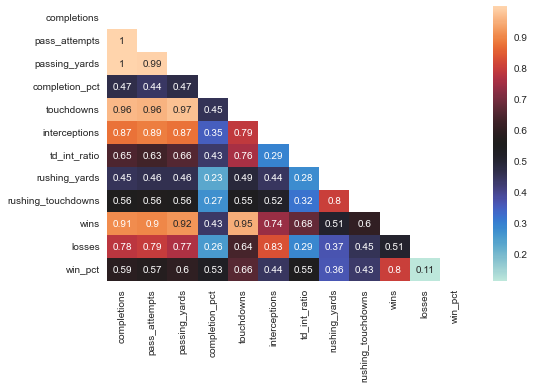

In [23]:
corr = passing_stats_21.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(passing_stats_21.corr(), annot=True, cmap='icefire', mask=mask)


In [62]:
x = passing_stats['wins']
y = passing_stats['touchdowns']

In [63]:
x.shape
y.shape

(62,)

In [64]:
x_matrix = x.values.reshape(-1,1)

In [65]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

In [66]:
reg.score(x_matrix, y)


0.8954260973230865

In [67]:
reg.intercept_


0.4762229458609255

In [68]:
reg.coef_

array([2.91187185])

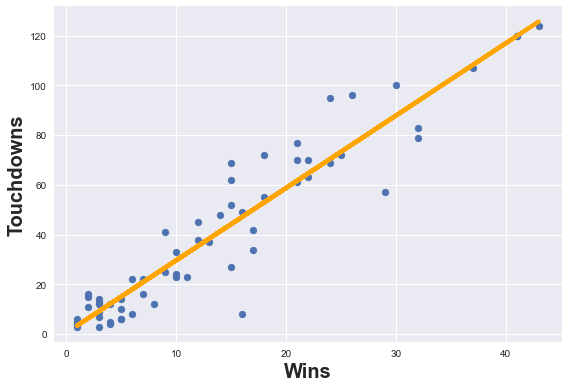

In [69]:
mpb.scatter(x, y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = mpb.plot(x, yhat, lw = 4, c = "orange", label = "Regression Line")
mpb.xlabel("Wins", fontsize = 20)
mpb.ylabel("Touchdowns", fontsize = 20)
mpb.show()

In [32]:
Rushing_stats = sqldf("""
WITH
df1
AS 
    (SELECT
        player, 
        team,
        sum(rush_att) AS rush_attempts,
        CAST(sum(rush_yds) AS float) AS rush_yds,
        sum(rush_td) AS rush_touchdowns,
        max(rush_long) AS rush_long,
        sum(fumbles_lost) AS fumbles_lost
    FROM 
        offense_subset
    WHERE 
        pos == 'RB'
    GROUP BY 
        player)
SELECT 
    *,
    rush_yds/rush_attempts AS yards_per_attempt
FROM
    df1
WHERE rush_attempts > 200
ORDER BY 
    yards_per_attempt DESC
""")
Rushing_stats

,player,team,rush_attempts,rush_yds,rush_touchdowns,rush_long,fumbles_lost,yards_per_attempt
0,Raheem Mostert,SFO,284,1591.0,14,80,3,5.602113
1,Nick Chubb,CLE,747,3965.0,28,88,5,5.307898
2,Jonathan Taylor,IND,585,3058.0,30,83,3,5.227350
3,Gus Edwards,BAL,298,1534.0,8,63,2,5.147651
4,Tony Pollard,DAL,321,1623.0,8,58,1,5.056075
5,Miles Sanders,PHI,501,2524.0,9,82,4,5.037924
6,Derrick Henry,TEN,1021,5055.0,46,94,5,4.951028
7,Chase Edmonds,ARI,281,1371.0,7,54,1,4.879004
8,Aaron Jones,GNB,673,3272.0,33,77,4,4.861813
9,Damien Harris,NWE,352,1662.0,17,64,2,4.721591


In [33]:
Rushing_stats.to_csv('Rushing_stats.csv', sep = '\t')

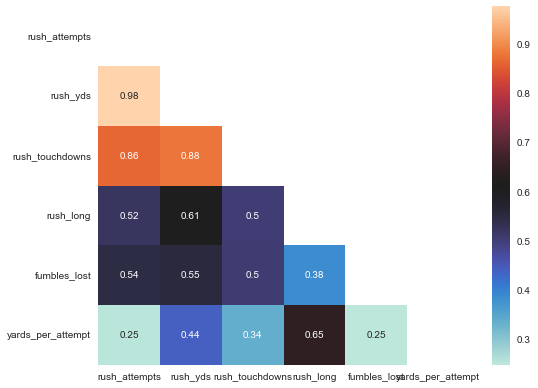

In [34]:
corr = Rushing_stats.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(Rushing_stats.corr(), annot=True, cmap='icefire', mask=mask)

In [35]:
top_10 = sqldf("""
SELECT 
    *
FROM 
    Rushing_stats 
ORDER BY
    rush_yds DESC
LIMIT 10""")
top_10

,player,team,rush_attempts,rush_yds,rush_touchdowns,rush_long,fumbles_lost,yards_per_attempt
0,Derrick Henry,TEN,1021,5055.0,46,94,5,4.951028
1,Nick Chubb,CLE,747,3965.0,28,88,5,5.307898
2,Dalvin Cook,MIN,848,3963.0,37,75,7,4.673349
3,Ezekiel Elliott,DAL,794,3369.0,28,47,8,4.243073
4,Aaron Jones,GNB,673,3272.0,33,77,4,4.861813
5,Josh Jacobs,LVR,745,3170.0,28,51,5,4.255034
6,Jonathan Taylor,IND,585,3058.0,30,83,3,5.227350
7,David Montgomery,CHI,726,2839.0,21,80,4,3.910468
8,Alvin Kamara,NOR,646,2831.0,27,49,1,4.382353
9,Leonard Fournette,JAX,619,2682.0,22,81,1,4.332795


In [36]:
top_10.to_csv('top_10_rushing_yards.csv', sep = '\t')

<AxesSubplot:title={'center':'Top 10 Total Rushing Yards since 2019 (Min. 200 attempts)'}, xlabel='Player', ylabel='Rushing Yards'>

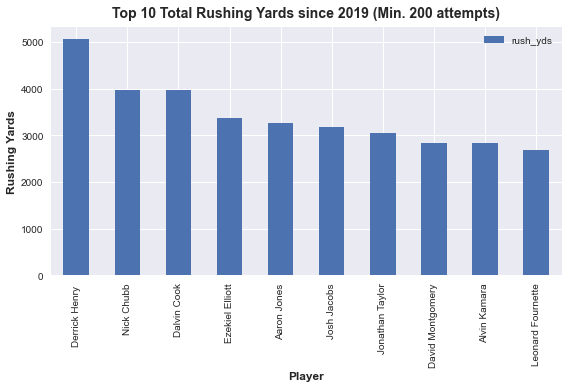

In [37]:
top_10.plot.bar('player', 'rush_yds', xlabel='Player', ylabel='Rushing Yards', title='Top 10 Total Rushing Yards since 2019 (Min. 200 attempts)')

In [38]:
home_offense = sqldf("""
SELECT
    team AS Team,
    SUM(pass_yds) AS Passing_YDS,
    SUM(pass_td) AS Passing_TD,
    SUM(rush_yds) AS Rushing_YDS,
    SUM(rush_td) AS Rushing_TD,
    AVG(home_score) AS Points_Scored
FROM
    offense_subset
WHERE
    home_team == team 
GROUP BY 
    team
ORDER BY
    AVG(home_score) DESC
""")
home_offense

,Team,Passing_YDS,Passing_TD,Rushing_YDS,Rushing_TD,Points_Scored
0,DAL,7783,59,3241,31,32.427609
1,TAM,7926,62,2527,25,29.226586
2,GNB,7608,64,3576,33,28.933148
3,KAN,9478,74,3580,30,28.376471
4,BAL,5554,46,5011,29,27.635015
5,SEA,6152,61,3204,20,26.810169
6,IND,5854,41,3380,28,26.692053
7,SFO,6372,42,3506,36,26.431611
8,NOR,6955,52,3236,27,26.110787
9,BUF,6668,53,3483,27,26.065089


In [39]:
away_offense = sqldf("""
SELECT
    team as Team,
    SUM(pass_yds) AS Passing_YDS,
    SUM(pass_td) AS Passing_TD,
    SUM(rush_yds) AS Rushing_YDS,
    SUM(rush_td) AS Rushing_TD,
    AVG(vis_score) AS Points_Scored
FROM
    offense_subset
WHERE
    vis_team == team 
GROUP BY 
    team
ORDER BY
    AVG(vis_score) DESC
""")
away_offense

,Team,Passing_YDS,Passing_TD,Rushing_YDS,Rushing_TD,Points_Scored
0,TAM,9021,69,2832,32,31.123596
1,KAN,7744,57,2744,24,30.745283
2,BUF,7778,59,3215,26,27.635802
3,BAL,5748,40,4406,36,27.422018
4,LAR,8384,53,3079,30,26.828479
5,NOR,5571,46,3081,29,26.635514
6,TEN,6138,42,4482,39,26.459538
7,SFO,7157,40,3650,36,25.697740
8,IND,5543,34,3449,32,25.243333
9,LAC,6900,50,2390,20,25.134021


# Exploration of Defensive Stats

In [40]:
defense_subset

,game_id,team,def_int,def_int_td,sacks,fumbles_rec,fumbles_rec_td,blocked_kick,safety,def_two_point_conv,total_ret_td,Team_abbrev,Opponent_abbrev,Opponent_score,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,CHI,0,0,5,0,0,0,0,0,0,CHI,GNB,10,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,GNB,1,0,5,0,0,0,0,0,0,GNB,CHI,3,GNB,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909080car,LAR,1,0,3,2,0,0,0,0,0,LAR,CAR,27,LAR,CAR,30,27,False,outdoors,grass,87,53,3,2019-09-08
3,201909080car,CAR,1,0,1,0,0,1,0,0,0,CAR,LAR,30,LAR,CAR,30,27,False,outdoors,grass,87,53,3,2019-09-08
4,201909080cle,CLE,0,0,4,0,0,0,0,0,0,CLE,TEN,43,TEN,CLE,43,13,False,outdoors,grass,71,55,10,2019-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,202201300kan,KAN,1,0,1,0,0,0,0,0,0,KAN,CIN,27,CIN,KAN,27,24,True,outdoors,grass,41,41,4,2022-01-30
1620,202201300ram,LAR,1,0,0,0,0,0,0,0,0,LAR,SFO,17,SFO,LAR,17,20,False,dome,matrixturf,72,45,0,2022-01-30
1621,202201300ram,SFO,1,0,2,0,0,0,0,0,0,SFO,LAR,20,SFO,LAR,17,20,False,dome,matrixturf,72,45,0,2022-01-30
1622,202202130cin,CIN,2,0,2,0,0,0,0,0,0,CIN,LAR,23,LAR,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


In [41]:
defense_team_stats = sqldf("""
SELECT
    team,
    SUM(def_int) AS interceptions,
    SUM(sacks) AS sacks,
    SUM(fumbles_rec) AS fumble_recoveries,
    SUM(blocked_kick) AS FG_blocks,
    SUM(safety) AS safties,
    SUM(total_ret_td) AS kick_return_td, 
    SUM(def_int_td)+SUM(fumbles_rec_td) AS defensive_td,
    AVG(Opponent_score) AS points_allowed
FROM 
    defense_subset
WHERE
    game_date >= 2022-09-01
GROUP BY 
    team 
ORDER BY
    points_allowed ASC
""")
defense_team_stats

,team,interceptions,sacks,fumble_recoveries,FG_blocks,safties,kick_return_td,defensive_td,points_allowed
0,NWE,67,107,21,5,0,1,10,18.588235
1,BUF,51,140,31,2,1,2,5,19.436364
2,BAL,33,113,30,1,1,1,11,19.903846
3,NOR,49,145,22,4,0,1,6,20.730769
4,LAR,51,170,25,1,1,1,10,21.072727
5,SFO,38,147,33,2,0,0,8,21.148148
6,PIT,52,167,35,2,1,1,7,21.627451
7,GNB,50,135,22,1,0,0,4,21.759259
8,KAN,50,127,28,3,1,3,9,21.842105
9,CHI,28,117,26,0,2,3,4,21.920000


In [42]:
defense_team_stats.to_csv('defense_stats.csv', sep='\t')

In [43]:
a = defense_team_stats['sacks']
b = defense_team_stats['interceptions']
c = defense_team_stats['fumble_recoveries']
x1 = defense_team_stats[['sacks','interceptions','fumble_recoveries']]
y = defense_team_stats['points_allowed']

In [44]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

/Users/nick/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         points_allowed   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     12.14
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           2.86e-05
Time:                        15:38:21   Log-Likelihood:                -61.021
No. Observations:                  32   AIC:                             130.0
Df Residuals:                      28   BIC:                             135.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                32.2651      1.608     20.070      0.000      28.972      35.558
sacks                -0.0437      0.019     -2.304      0.029      -0.083      -0.005
interceptions        -0.1089      0.036     -3.023      0.005      -0.183      -0.035
fumble_recoveries     0.0356      0.065      0.546      0.589      -0.098       0.169
==============================================================================
Omnibus:                        7.415   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.824
Skew:                          -0.964   Prob(JB):                       0.0544
Kurtosis:                       3.805   Cond. No.                         678.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Measure')

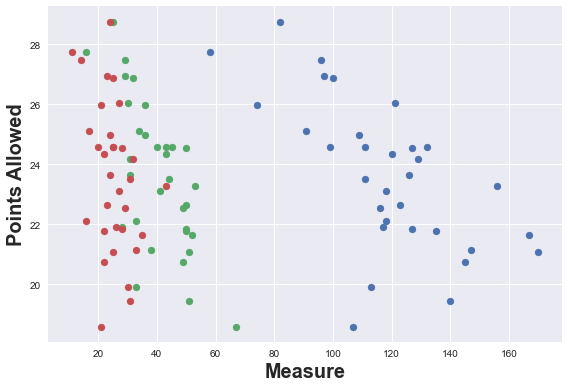

In [45]:
mpb.scatter(a, y, label='Sacks')
mpb.scatter(b, y, label='Interceptions')
mpb.scatter(c, y, label='Fumble Recoveries')
mpb.ylabel('Points Allowed', fontsize = 20)
mpb.xlabel('Measure', fontsize = 20)

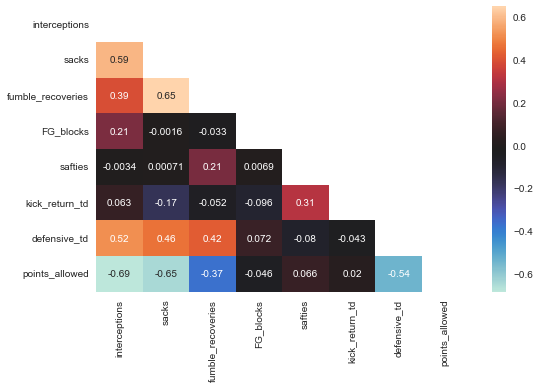

In [46]:
corr = defense_team_stats.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(defense_team_stats.corr(), annot=True, cmap='icefire', mask=mask)


From the correlation heatmap we can see that interceptions have the strongest relationship on points allowed. 